### Подберите скорость обучения (alpha) и количество итераций для градиентного спуска.

В качестве исходного материала воспользуюсь примером из методички

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)

In [3]:
n_features = 2
n_objects = 1000

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

w = np.zeros(n_features)

In [4]:
X

array([[-3.82407965,  0.71840677],
       [ 3.07256558, -1.07650956],
       [ 6.73069878,  2.58761634],
       ...,
       [ 3.24310547, -3.15404065],
       [ 3.10544532, -5.62991936],
       [-1.07777636, -1.49774385]])

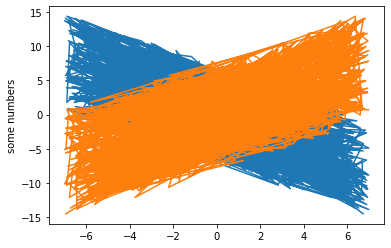

In [5]:
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.ylabel('some numbers')
plt.show()

In [6]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [7]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

В случае использования нормального уравнения функционал ошибки составляет 0.2417


In [8]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    # шаг градиентного спуска (пременю изменяемый шаг с константой 1 и номером итерации)
    eta = 1/(iter_num + 1)
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    print(iter_num, mserror(X, new_w, Y), eta)
    
w_list = np.array(w_list)

print(X.shape, w.shape)
print()

1 42022.60974431224 1.0
2 11093311.040594744 0.5
3 1227085851.2380924 0.3333333333333333
4 71828796676.63623 0.25
5 2525799949940.46 0.2
6 57753334414625.81 0.16666666666666666
7 906097564239105.8 0.14285714285714285
8 1.0136766313777142e+16 0.125
9 8.320384530640158e+16 0.1111111111111111
10 5.120581910601957e+17 0.1
11 2.402575175423378e+18 0.09090909090909091
12 8.706223297484809e+18 0.08333333333333333
13 2.4609642818233803e+19 0.07692307692307693
14 5.467436676420638e+19 0.07142857142857142
15 9.59978724790383e+19 0.06666666666666667
16 1.3370942003364582e+20 0.0625
17 1.4804906988595138e+20 0.058823529411764705
18 1.303917445986427e+20 0.05555555555555555
19 9.126431219821674e+19 0.05263157894736842
20 5.06404547300148e+19 0.05
21 2.218554457226975e+19 0.047619047619047616
22 7.628949432052807e+18 0.045454545454545456
23 2.042812660771293e+18 0.043478260869565216
24 4.215406002350815e+17 0.041666666666666664
25 6.6139148354830696e+16 0.04
26 7754730486281324.0 0.03846153846153846

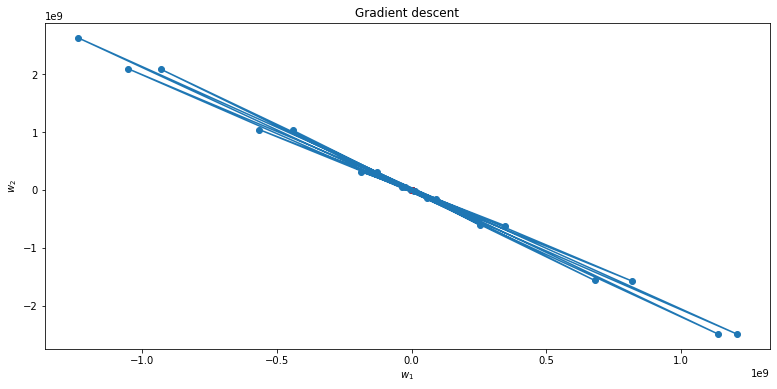

In [9]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

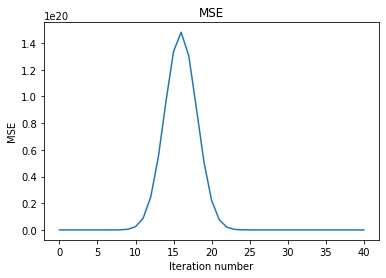

In [10]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [19]:
def calc_mse(y, y_pred):
    return (sum((y - y_pred)**2)) / len(y)

In [49]:
eta = 0.05


for i in range(1000):
    y_pred = np.dot(w, X.T)
    y = X.dot(w_true)
    err = calc_mse(y, y_pred)
    #for ii in range(w.shape[0]):
        #w[ii] -= eta * (1/len(y) * 2 * np.sum(X[ii] * (y_pred - y)))
    #print((y_pred[i] - y[i]))
    w = w - eta * (1/len(y) * 2 * np.sum(X[i] * (y_pred[i] - y[i])))
    #print(w)
    if i % 100 == 0:
        print(i, w, err)

0 [-1.0887071  1.0010496] 0.0004013559223217901
100 [-1.08880173  1.00095497] 0.00039955156075139567
200 [-1.08887941  1.00087729] 0.00039759000935651466
300 [-1.0889292  1.0008275] 0.0003969866182986553
400 [-1.0890312  1.0007255] 0.00039602049594156594
500 [-1.08898436  1.00077234] 0.0003964090245780651
600 [-1.08902892  1.00072779] 0.0003960042139230921
700 [-1.08904076  1.00071594] 0.00039605284104999547
800 [-1.08911378  1.00064292] 0.00039577780434432155
900 [-1.08910659  1.00065011] 0.00039578570970163037
